In [3]:
library('rjags')

Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


## Exercice 5.1
This exercise extends the ideas of Table 5.4, so at this time, please review Table 5.4 and its discussion in the text.

Suppose that the same randomly selected person as in Table 5.4 gets re-tested
after the first test result was positive, and on the re-test, the result is negative. When
taking into account the results of both tests, what is the probability that the person has
the disease? Hint: For the prior probability of the re-test, use the posterior computed
from the Table 5.4. Retain as many decimal places as possible, as rounding can have a
surprisingly big effect on the results. One way to avoid unnecessary rounding is to do
the calculations in R.

In [19]:
positive_test = 0.99 * 0.001 + 0.05 * (1 - 0.001)
negative_test = (1 - 0.99) * 0.001 + (1 - 0.05)*(1 - 0.001)
c(positive_test, negative_test)



[1] 0.05094 0.94906

### Bayes' Rule
p(θ|D)
posterior
= p(D|θ)
likelihood
p(θ)
prior
/ p(D)
evidence

posterior = prior * likelihood / evidence

In [10]:
prior_disease = 0.001
prob_test_given_disease = 0.99
prob_test_given_no_disease = 0.05


In [8]:
# After the first test (positive)
first_test = 0.001 * (1 - 0.005) / positive_test
first_test

[1] 0.01970687

In [12]:
second_test = first_test * (1 - 0.005) / (0.01 )

second_test

[1] 0.3883608

## Exercise 5.2

Suppose that the population consists of 100,000 people. Compute how many
people would be expected to fall into each cell of Table 5.4. To compute the expected
frequency of people in a cell, just multiply the cell probability by the size of the
population. To get you started, a few of the cells of the frequency table are filled
in here:

Notice the frequencies on the lower margin of the table. They indicate that out of
100,000 people, only 100 have the disease, while 99,900 do not have the disease. These
marginal frequencies instantiate the prior probability that p(θ = ¨ ) = 0.001. Notice
also the cell frequencies in the column θ = ¨ , which indicate that of 100 people
with the disease, 99 have a positive test result and 1 has a negative test result. These cell
frequencies instantiate the hit rate of 0.99. Your job for this part of the exercise is to fill
in the frequencies of the remaining cells of the table.

### A


In [20]:
population = 100000
marg_D_pos = positive_test * population
marg_D_neg = negative_test * population
c(marg_D_pos, marg_D_neg)
sum(marg_D_neg, marg_D_pos)

[1]  5094 94906

[1] 1e+05

In [23]:
positive_with_disease = 99
negative_with_disease = 1
positive_wo_disease = marg_D_pos - positive_with_disease
negative_wo_disease = marg_D_neg - negative_with_disease
c(positive_wo_disease, negative_wo_disease)

[1]  4995 94905

### B
Suppose that the population consists of 100,000 people. Compute how many
people would be expected to fall into each cell of Table 5.4. To compute the expected
frequency of people in a cell, just multiply the cell probability by the size of the
population. To get you started, a few of the cells of the frequency table are filled
in here:

Notice the frequencies on the lower margin of the table. They indicate that out of
100,000 people, only 100 have the disease, while 99,900 do not have the disease. These
marginal frequencies instantiate the prior probability that p(θ = ¨ ) = 0.001. Notice
also the cell frequencies in the column θ = ¨ , which indicate that of 100 people
with the disease, 99 have a positive test result and 1 has a negative test result. These cell
frequencies instantiate the hit rate of 0.99. Your job for this part of the exercise is to fill
in the frequencies of the remaining cells of the table.

In [37]:
disease_given_positive = positive_with_disease / marg_D_pos
disease_given_positive

[1] 0.01943463

### C
Now we’ll consider a related representation of the probabilities in terms of
natural frequencies, which is especially useful when we accumulate more data. This
type of representation is called a “Markov” representation by Krauss, Martignon, and
Hoffrage (1999). Suppose now we start with a population of N = 10, 000, 000 people.
We expect 99.9% of them (i.e., 9,990,000) not to have the disease, and just 0.1% (i.e.,
10,000) to have the disease. Now consider how many people we expect to test positive.
Of the 10,000 people who have the disease, 99%, (i.e., 9,900) will be expected to test
positive. Of the 9,990,000 people who do not have the disease, 5% (i.e., 499,500) will
be expected to test positive. Now consider re-testing everyone who has tested positive
on the first test. How many of them are expected to show a negative result on the retest?
Use this diagram to compute your answer:

When computing the frequencies for the empty boxes above, be careful to use the proper
conditional probabilities!

In [39]:
population = 1e6
no_disease = 9990000
disease = 10000
prob_test_given_disease = disease * disease_given_positive
# prob_no_test_given_disease
# prob_test_given_no_disease
# prob_no_test_given_no_disease

In [40]:
prob_test_given_disease

[1] 194.3463

## Exercise 6.1
For this exercise, use the R function
explained in Section 6.6 (BernBeta.R). (Don’t forget to source the function before
calling it.) Notice that the function returns the posterior beta values each time it is
called, so you can use the returned values as the prior values for the next function call.
### A
Start with a prior distribution that expresses some uncertainty that a coin is
fair: beta(θ|4, 4). Flip the coin once; suppose we get a head. What is the posterior
distribution?

In [42]:
source('../BernBeta.R')

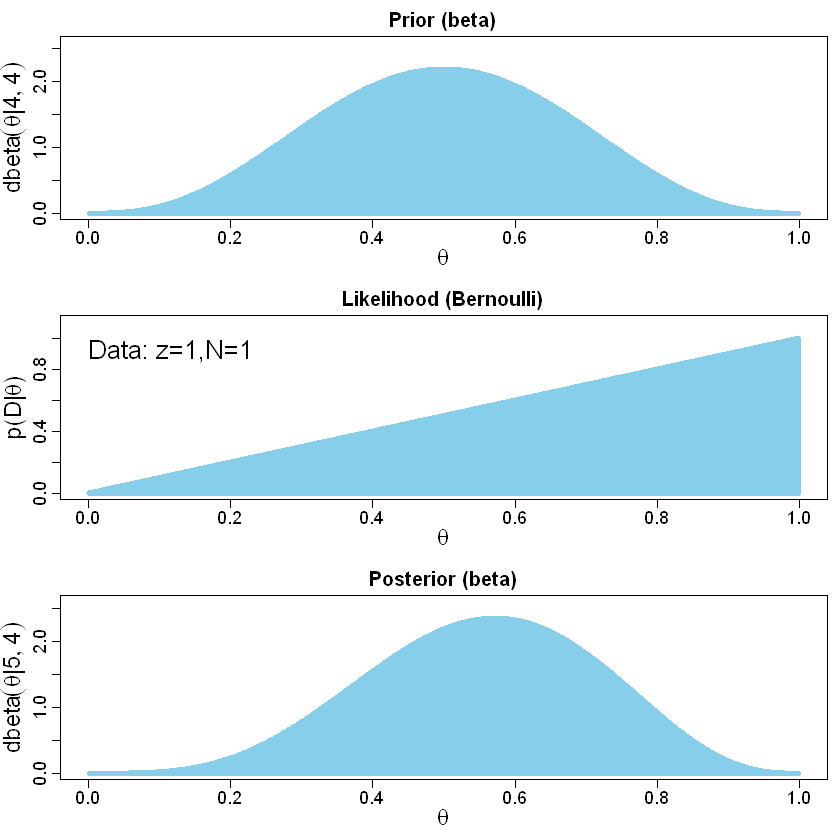

In [49]:
post = BernBeta(c(4, 4), 1)

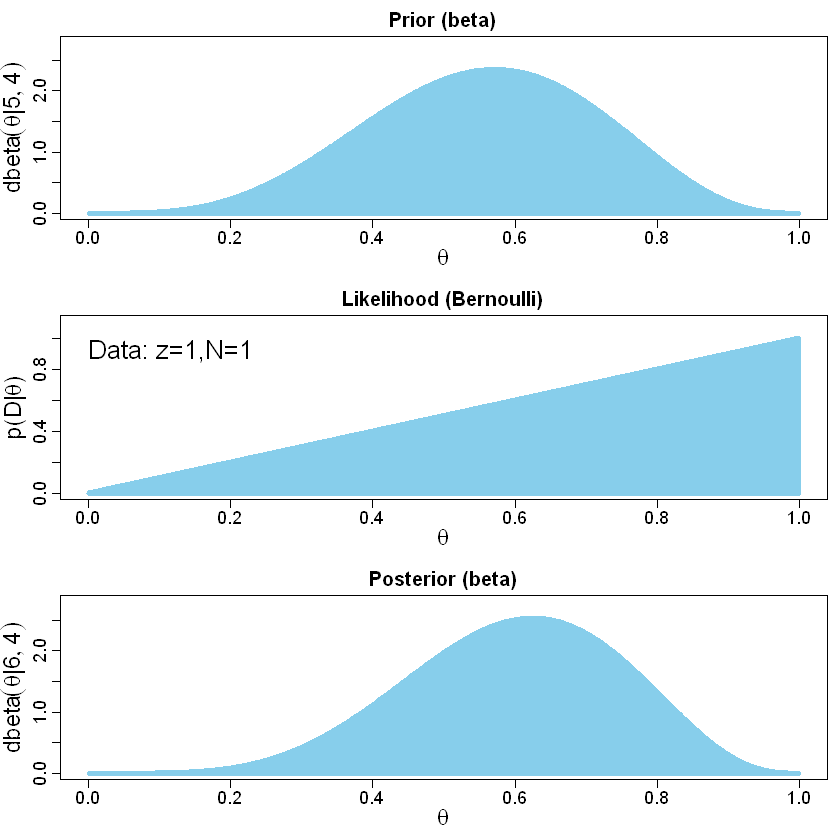

In [50]:
post2 = BernBeta(post, 1)

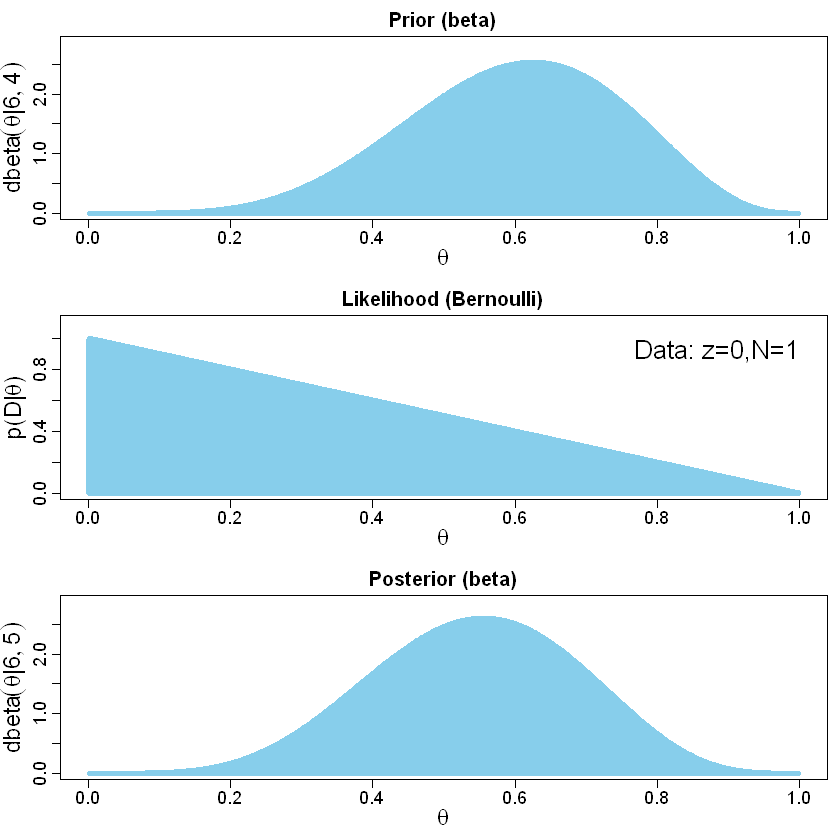

In [51]:
post3 = BernBeta(post2, 0)

### D
Do T, H, H instead of H, H, T

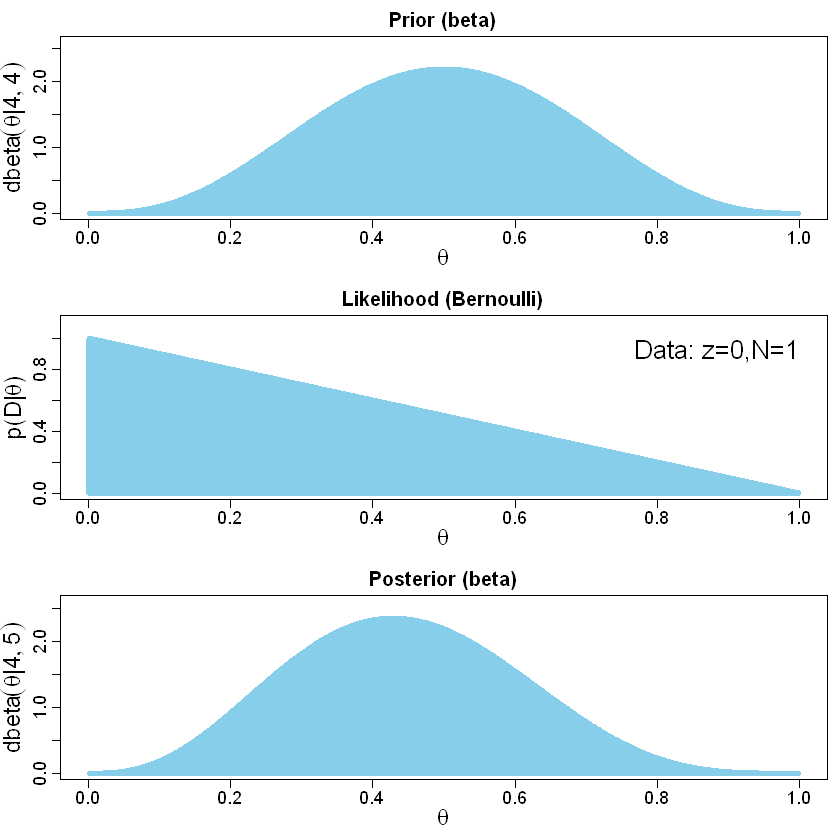

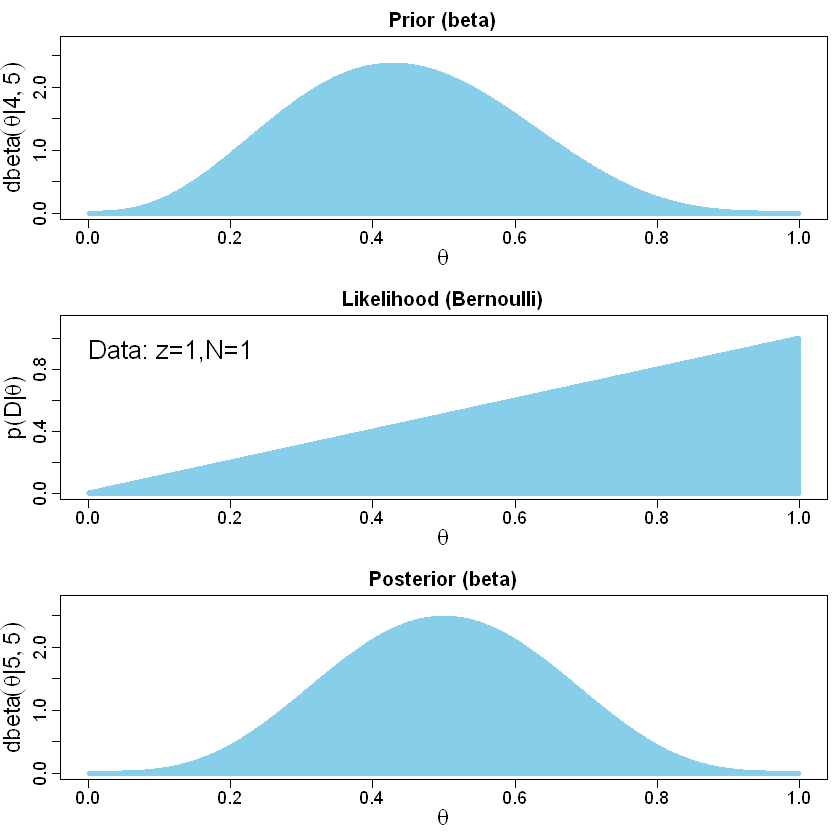

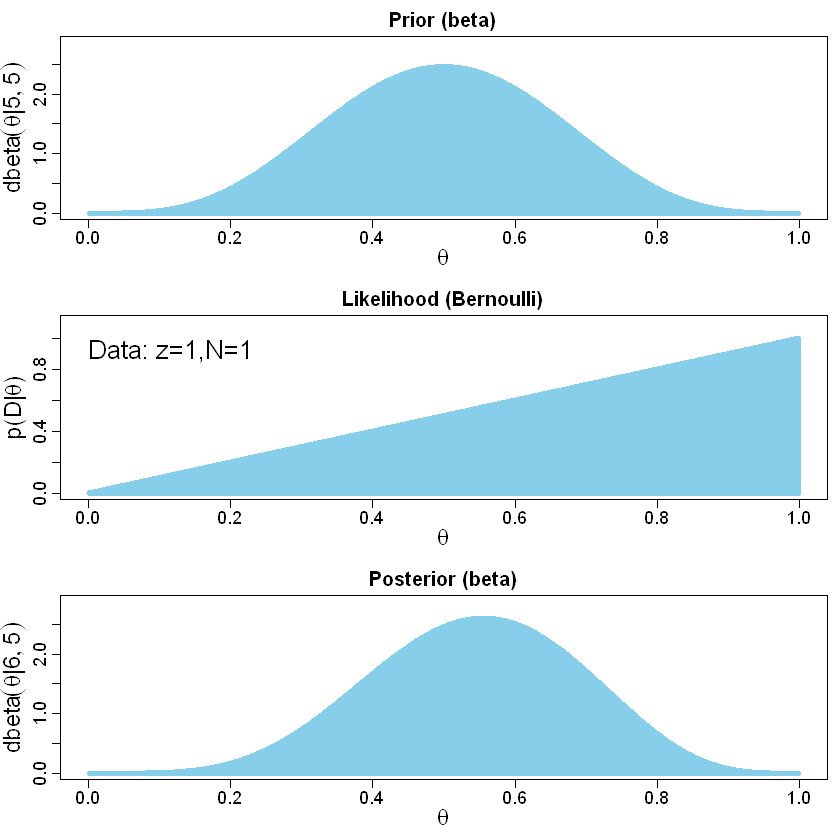

In [52]:
post = BernBeta(c(4, 4), 0)
post2 = BernBeta(post, 1)
post3 = BernBeta(post2, 1)

So, we get the same result!

## Exercise 6.2
Suppose an election is approaching, and you are interested in knowing
whether the general population prefers candidate A or candidate B. There is a just-published poll in the newspaper, which states that of 100 randomly sampled people, 58
preferred candidate A and the remainder preferred candidate B.
### A
Suppose that before the newspaper poll, your prior belief was a uniform
distribution. What is the 95% HDI on your beliefs after learning of the newspaper poll
results?


In [ ]:
prior = c(1, 1)

### B
You want to conduct a follow-up poll to narrow down your estimate of the
population’s preference. In your follow-up poll, you randomly sample 100 other people
and find that 57 prefer candidate A and the remainder prefer candidate B. Assuming
that peoples’ opinions have not changed between polls, what is the 95% HDI on the
posterior?